<a href="https://colab.research.google.com/github/chimuka-e-sakala/code-unza25-csc4792-project_team_3-repository-for-Project-Team-3/blob/main/code_unza25_csc4792_project_team_3_notebook_ipynb_for_Project_Team_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. BUSINESS UNDERSTANDING**  

## **1. Problem Statement**  
The University of Zambia *Journal of Agriculture and Biomedical Sciences* **(UNZA-JABS)** is a quarterly Journal open to journal article publication in the fields of **agriculture, medicine, veterinary medicine and biomedical sciences as well as such allied life sciences**. The Journal welcomes manuscripts submissions that meet the general criteria of significance and scientific excellence. Currently, the classification of submitted articles into these categories is performed manually by editors or reviewers, which introduces several challenges:  

- **Time-Consuming Process**: Manual categorization requires significant editorial effort, delaying publication timelines.  
- **Subjectivity and Human Error**: Different reviewers may classify the same article differently based on their expertise, leading to inconsistencies.  
- **Scalability Issues**: As the number of submissions grows, manual classification becomes unsustainable.  

To address these challenges, we propose developing an **automated machine learning (ML)-based classification system** that uses **article titles and abstracts** to predict the correct discipline. This system will improve efficiency, reduce bias, and enhance the journal’s ability to organize and index articles effectively.  

---

## **2. Business Objectives**  
The primary goal is to **automate and optimize the classification process** while ensuring high accuracy. Success from a real-world perspective would mean:  

### **Key Objectives:**  
**Reduce Editorial Workload** - Minimize the time and effort required for manual categorization.  
**Improve Classification Accuracy** - Achieve higher consistency than human-based classification.  
**Enhance Article Discoverability** - Ensure researchers can easily find articles in their field.  
**Support Scalability** - Handle increasing submission volumes without additional staffing.  

### **Stakeholder Benefits:**  
- **Editors & Reviewers**: Spend less time on administrative tasks and more on content evaluation.  
- **Researchers & Readers**: Quickly locate relevant articles due to accurate tagging.  
- **Journal Management**: Improve operational efficiency and reduce publication delays.  

---

## **3. Data Mining Goals**  
To achieve the business objectives, we will implement a **text classification model** using Natural Language Processing (NLP) and supervised learning. The key steps include:  

### **Step 1: Data Collection & Preprocessing**  
- **Dataset Acquisition**: Gather labeled journal articles (title + abstract + discipline) from past issues.  
- **Text Cleaning**:  
  - Remove special characters, numbers, and irrelevant formatting.  
  - Apply tokenization, stopword removal, and lemmatization (e.g., using NLTK or spaCy).  
- **Feature Extraction**:  
  - Bag-of-Words (BoW) / TF-IDF for traditional ML models.  
  - Word embeddings (Word2Vec, GloVe) or transformer-based embeddings (BERT, SciBERT) for deep learning models.  

### **Step 2: Model Development**  
We will experiment with multiple classification algorithms:  
- **Traditional ML Models**:  
  - Naïve Bayes (baseline for text classification)  
  - Support Vector Machines (SVM)  
  - Random Forest / XGBoost (with TF-IDF features)  
- **Deep Learning Models**:  
  - LSTM / BiLSTM for sequential text analysis  
  - Transformer-based models (e.g., BERT, DistilBERT for higher accuracy)  

### **Step 3: Model Evaluation & Optimization**  
- **Performance Metrics**:  
  - Accuracy, Precision, Recall, F1-Score (per class and macro-average).  
  - Confusion matrix to analyze misclassifications.  
- **Hyperparameter Tuning**:  
  - GridSearchCV / RandomSearch for traditional models.  
  - Learning rate scheduling for deep learning models.  
- **Explainability**:  
  - SHAP values / LIME to interpret model decisions.  
  - Key term extraction (e.g., most influential words for each category).  

### **Step 4: Deployment & Integration**  
- **API Development**: Wrap the best model in a REST API (Flask/FastAPI).  
- **Journal Submission System Integration**:  
  - Automatically suggest categories during manuscript submission.  
  - Allow editors to override predictions if needed.  

---

## **4. Success Criteria**  
For the model to be considered successful, it must meet the following benchmarks:  

### **Performance Metrics:**  
**Accuracy ≥ 85%** (to ensure reliable automated classification).  
**Precision & Recall ≥ 80% per class** (to avoid bias toward any discipline).  
**Balanced F1-Score** (to ensure fairness across categories).  

### **Practical Deployment Requirements:**  
**Low Latency** - Predictions should take <1 second to avoid slowing submissions.  
**Scalability** - Model should handle thousands of submissions without performance drops.  
**Explainability** - Editors should understand why an article was classified a certain way.  

---

## **5. Potential Challenges & Mitigation Strategies**  
| **Challenge** | **Mitigation Strategy** |
|--------------|------------------------|
| **Class Imbalance** | Use oversampling (SMOTE) or class weights in training. |
| **Ambiguous Interdisciplinary Articles** | Introduce a "Hybrid/Interdisciplinary" category. |
| **Domain-Specific Terminology** | Use SciBERT/BioBERT instead of generic embeddings. |
| **Model Interpretability** | Apply SHAP/LIME for transparency in predictions. |

---

## **6. Future Enhancements**  
- **Multi-Label Classification** (for articles belonging to multiple fields).  
- **Active Learning** - Allow editors to correct misclassifications to improve the model iteratively.  
- **Trend Analysis** - Use classification data to track research trends over time.  

---

## **Conclusion**  
This project will develop an **automated, accurate, and scalable classification system** for the *Journal of Agricultural and Biomedical Sciences*, reducing manual effort and improving consistency. By leveraging NLP and ML, we aim to enhance the journal’s operational efficiency and support researchers in accessing relevant content faster

# **2. DATA UNDERSTANDING**


In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Project/jabs.csv')

In [ ]:
df.head()

,title,abstract,discipline
0,Performance of Cowpea Progenitor and Hybrids i...,Among abiotic factors limiting cowpea producti...,Agriculture Sciences
1,Exploring Dietary Patterns and Nutrition Statu...,This study explored food consumption patterns ...,Agriculture Sciences
2,Programmed Death Ligand-1 Expression in Gastri...,Gastric cancer is a highly fatal disease in Za...,Biomedical Sciences
3,Contagious Bovine Pleuropneumonia-Associated F...,Contagious bovine pleuropneumonia (CBPP) is st...,Veterinary Medicine
4,Potential of a Powdered Mopane Worms-Breakfast...,"In Zambia, the intake of animal-sourced protei...",Agriculture Sciences


In [ ]:
df.shape

(5, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       5 non-null      object
 1   abstract    5 non-null      object
 2   discipline  5 non-null      object
dtypes: object(3)
memory usage: 252.0+ bytes


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Project/jabs.csv')

In [ ]:
df.describe(include='all')

,title,abstract,discipline
count,5,5,5
unique,5,5,3
top,Performance of Cowpea Progenitor and Hybrids i...,Among abiotic factors limiting cowpea producti...,Agriculture Sciences
freq,1,1,3


In [ ]:
df.isnull().sum()

,0
title,0
abstract,0
discipline,0


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Project/jabs.csv')

In [ ]:
df['discipline'].value_counts()

,count
discipline,
Agriculture Sciences,3
Biomedical Sciences,1
Veterinary Medicine,1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

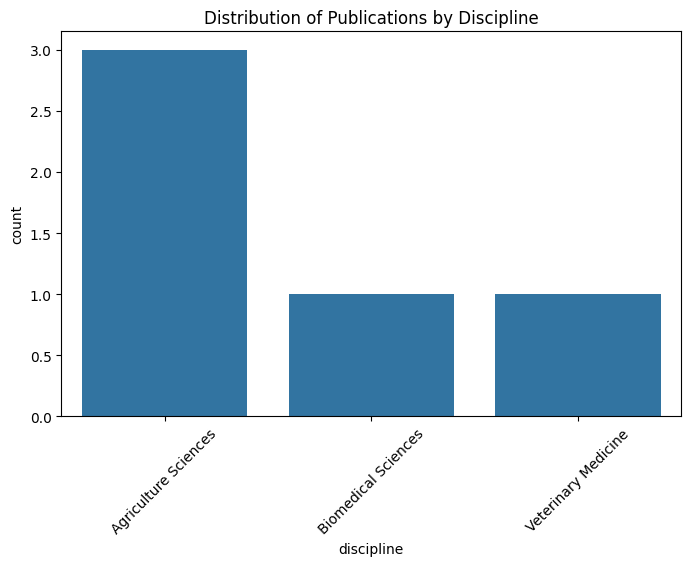

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='discipline', order=df['discipline'].value_counts().index)
plt.title('Distribution of Publications by Discipline')
plt.xticks(rotation=45)
plt.show()